In [2]:
import tensorflow as tf

# tf.reduce_mean
x=tf.Variable([[1,1],[3,3]],dtype=tf.float32)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [3]:
# column欄取平均
print(sess.run(tf.reduce_mean(x)))

2.0


In [4]:
x2=tf.Variable([[1,1],[3,3]],dtype=tf.float32)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [5]:
# row列取平均
print(sess.run(tf.reduce_mean(x2,1)))

[ 1.  3.]


In [7]:
'''
手寫辨識 MNIST
'''
# import numpy as np
import argparse
import sys
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
FLAGS = None

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist.train.images[0])
# create the model

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.      

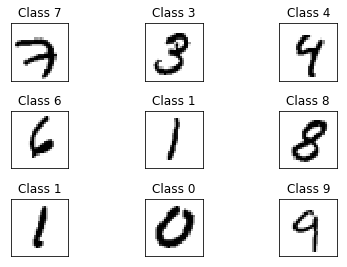

In [9]:
'''
顯示手寫訓練圖片
'''
import numpy as np

fig = plt.figure()
for i in range(9):     # 有 9 張圖
    number=np.argmax(mnist.train.labels[i])
    # print(number), argmax顯示陣列最大值的索引
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='binary',
              interpolation='none')
    plt.title("Class {}".format(number))
    plt.xticks([])
    plt.yticks([])
fig

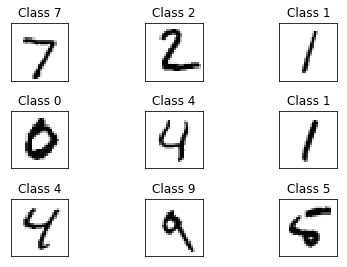

In [10]:
fig = plt.figure()
for i in range(9):
    # test資料
    number=np.argmax(mnist.test.labels[i])
    # print(number), argmax顯示陣列最大值的索引
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(mnist.test.images[i].reshape(28,28), cmap='binary',
              interpolation='none')
    plt.title("Class {}".format(number))
    plt.xticks([])
    plt.yticks([])
fig

In [11]:
x = tf.placeholder(tf.float32, [None, 784])    # 手寫圖形無限張，784個維度向量，由 28*28像素得到
W = tf.Variable(tf.zeros([784, 10]))           # 輸出的 vector為 10，[784, 10]為784維度，10個類別 (0~10)
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# 定義成本和最佳化函數
y_ = tf.placeholder(tf.float32, [None, 10])    # y_ 真實值的 one-hot

In [17]:
'''
交叉嫡函數
'''
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))    # 實際標籤 labels和預測迴歸值 logits

# 使用梯度遞減法為最小化損失函數，增加優化，以作為最小化交叉嫡
train_step = tf.train.GradientDescentOptimizer(                          # 做微分的梯度遞減
                        0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()                # 交談式的 session
tf.global_variables_initializer().run()       # 初始化之後執行

In [21]:
# train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})             # feed_dict的值給定 train_step作最佳化
    
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))            # 實際標籤 y_和預設標籤 y的值是否相同
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))          # cast將 boolean 轉 float求取平均值
print("執行預設結果:", sess.run(accuracy, feed_dict={x: mnist.test.images,   # accuracy的節點來執行 run結果
                                   y_: mnist.test.labels}))

執行預設結果: 0.9233
